# Training

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import tensorflow_hub as hub

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import PIL

In [ ]:
import pathlib

In [ ]:
import joblib

## Image Data

### Importing Image Dataset

### From google drive

```
##Convert this cell to code to import from google drive

from google.colab import drive
drive.mount('/content/gdrive')
!cp /content/gdrive/MyDrive/leaf.zip /content
```

```
!mkdir /content/images
!unzip -q leaf.zip -d /content/images
!mkdir /content/images/train; mkdir /content/images/validation; mkdir /content/images/test
```

### Traversing to folders

In [ ]:
imagepath = pathlib.Path('/hb74ynkjcn-5')

In [ ]:
root_folder = "hb74ynkjcn-5"
healthy_folder_name =[]
diseased_folder_name = []
for foldername, subfolders, filenames in os.walk(root_folder):
  if 'healthy' in subfolders:
    healthy_folder_name.append(os.path.join(foldername, 'healthy/'))
    #print("Filenames:", filenames)
  if 'diseased' in subfolders:
    diseased_folder_name.append(os.path.join(foldername, 'diseased/'))
print(healthy_folder_name)
print(diseased_folder_name)

['hb74ynkjcn-5\\Alstonia Scholaris (P2)\\healthy/', 'hb74ynkjcn-5\\Arjun (P1)\\healthy/', 'hb74ynkjcn-5\\Basil (P8)\\healthy/', 'hb74ynkjcn-5\\Chinar (P11)\\healthy/', 'hb74ynkjcn-5\\Gauva (P3)\\healthy/', 'hb74ynkjcn-5\\Jamun (P5)\\healthy/', 'hb74ynkjcn-5\\Jatropha (P6)\\healthy/', 'hb74ynkjcn-5\\Lemon (P10)\\healthy/', 'hb74ynkjcn-5\\Mango (P0)\\healthy/', 'hb74ynkjcn-5\\Pomegranate (P9)\\healthy/', 'hb74ynkjcn-5\\Pongamia Pinnata (P7)\\healthy/']
['hb74ynkjcn-5\\Alstonia Scholaris (P2)\\diseased/', 'hb74ynkjcn-5\\Arjun (P1)\\diseased/', 'hb74ynkjcn-5\\Bael (P4)\\diseased/', 'hb74ynkjcn-5\\Chinar (P11)\\diseased/', 'hb74ynkjcn-5\\Gauva (P3)\\diseased/', 'hb74ynkjcn-5\\Jamun (P5)\\diseased/', 'hb74ynkjcn-5\\Jatropha (P6)\\diseased/', 'hb74ynkjcn-5\\Lemon (P10)\\diseased/', 'hb74ynkjcn-5\\Mango (P0)\\diseased/', 'hb74ynkjcn-5\\Pomegranate (P9)\\diseased/', 'hb74ynkjcn-5\\Pongamia Pinnata (P7)\\diseased/']


In [ ]:
print('No of healthy classes',len(healthy_folder_name))
print('No of diseased classes',len(diseased_folder_name))

No of healthy classes 11
No of diseased classes 11


### Importing path of images of diseased leaves

In [ ]:
healthy = []
for folder in healthy_folder_name:
  folder = pathlib.Path(folder)
  print(folder)
  healthy.append(list(folder.glob('*.JPG')))

hb74ynkjcn-5\Alstonia Scholaris (P2)\healthy
hb74ynkjcn-5\Arjun (P1)\healthy
hb74ynkjcn-5\Basil (P8)\healthy
hb74ynkjcn-5\Chinar (P11)\healthy
hb74ynkjcn-5\Gauva (P3)\healthy
hb74ynkjcn-5\Jamun (P5)\healthy
hb74ynkjcn-5\Jatropha (P6)\healthy
hb74ynkjcn-5\Lemon (P10)\healthy
hb74ynkjcn-5\Mango (P0)\healthy
hb74ynkjcn-5\Pomegranate (P9)\healthy
hb74ynkjcn-5\Pongamia Pinnata (P7)\healthy


In [ ]:
print(len(healthy))
print(healthy[0][1],len(healthy[0]))

11
hb74ynkjcn-5\Alstonia Scholaris (P2)\healthy\0003_0002.JPG 179


### Importing path of images of diseased leaves

In [ ]:
diseased = []
for folder in diseased_folder_name:
  folder = pathlib.Path(folder)
  print(folder)
  diseased.append(list(folder.glob('*.JPG')))

hb74ynkjcn-5\Alstonia Scholaris (P2)\diseased
hb74ynkjcn-5\Arjun (P1)\diseased
hb74ynkjcn-5\Bael (P4)\diseased
hb74ynkjcn-5\Chinar (P11)\diseased
hb74ynkjcn-5\Gauva (P3)\diseased
hb74ynkjcn-5\Jamun (P5)\diseased
hb74ynkjcn-5\Jatropha (P6)\diseased
hb74ynkjcn-5\Lemon (P10)\diseased
hb74ynkjcn-5\Mango (P0)\diseased
hb74ynkjcn-5\Pomegranate (P9)\diseased
hb74ynkjcn-5\Pongamia Pinnata (P7)\diseased


In [ ]:
print(len(diseased))
print(len(diseased[0]))

11
254


In [ ]:
diseased[0][:5]

[WindowsPath('hb74ynkjcn-5/Alstonia Scholaris (P2)/diseased/0014_0001.JPG'),
 WindowsPath('hb74ynkjcn-5/Alstonia Scholaris (P2)/diseased/0014_0002.JPG'),
 WindowsPath('hb74ynkjcn-5/Alstonia Scholaris (P2)/diseased/0014_0003.JPG'),
 WindowsPath('hb74ynkjcn-5/Alstonia Scholaris (P2)/diseased/0014_0004.JPG'),
 WindowsPath('hb74ynkjcn-5/Alstonia Scholaris (P2)/diseased/0014_0005.JPG')]

In [ ]:
healthy[1][:5]

[WindowsPath('hb74ynkjcn-5/Arjun (P1)/healthy/0002_0001.JPG'),
 WindowsPath('hb74ynkjcn-5/Arjun (P1)/healthy/0002_0002.JPG'),
 WindowsPath('hb74ynkjcn-5/Arjun (P1)/healthy/0002_0003.JPG'),
 WindowsPath('hb74ynkjcn-5/Arjun (P1)/healthy/0002_0004.JPG'),
 WindowsPath('hb74ynkjcn-5/Arjun (P1)/healthy/0002_0005.JPG')]

### Total number of images in dataset

In [ ]:
sum=0
for i in healthy:
  sum += len(i)
print('No. of healthy leaves :',sum)

No. of healthy leaves : 2277


In [ ]:
sum=0
for i in diseased:
  sum += len(i)
print('No. of diseased leaves :',sum)

No. of diseased leaves : 2225


## Data Preparation

### XLabel & YLabel

In [ ]:
img = cv2.imread(str(healthy[0][1]))

````
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
````

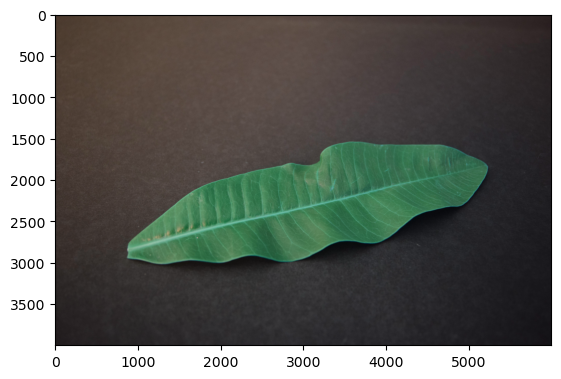

In [ ]:
plt.imshow(img) #diplaying RGB mode read in BGR mode

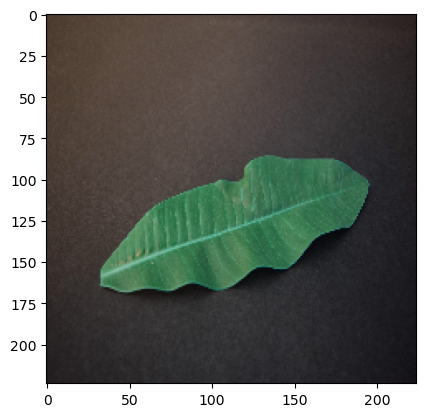

In [ ]:
img = cv2.imread(str(healthy[0][1]))
resized_img = cv2.resize(img,(224,224))
plt.imshow(resized_img)

### 600*400 resized image

In [ ]:
x=[]
y=[]

In [ ]:
def image2array(x,y,image_list,y_label_value):
  for i in image_list:
    for image in i:
            img = cv2.imread(str(image))
            resized_img = cv2.resize(img,(600,400))
            x.append(resized_img)
            y.append(y_label_value)

In [ ]:
image2array(x,y,healthy,0)
image2array(x,y,diseased,1)

In [ ]:
len(x),len(y)

(4502, 4502)

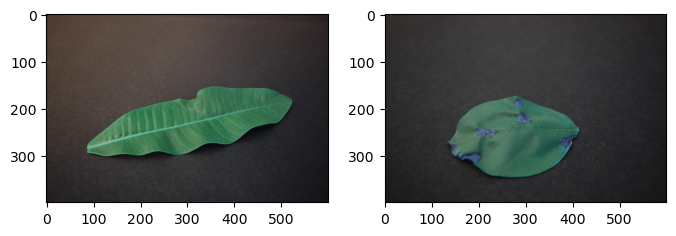

In [ ]:
plt.figure(figsize=(8, 7))
plt.subplot(1,2,1)
plt.imshow(x[1])
plt.subplot(1,2,2)
plt.imshow(x[-1])

#### Saving raw 224*224 resized image to Numpy Array

```
np.save('Raw_image/x_raw_600_400.npy', x)
np.save('Raw_image/y.npy', y)
```

```
from google.colab import files
files.download('x_600_400.npy')
files.download('x_600_400.pkl')
#files.download('y.npy')
#files.download('y.pkl')
```

### 224*224 resized image

In [ ]:
x=[]
y=[]

In [ ]:
def image2array(x,y,image_list,y_label_value):
  for i in image_list:
    for image in i:
            img = cv2.imread(str(image))
            resized_img = cv2.resize(img,(224,224))
            x.append(resized_img)
            y.append(y_label_value)

In [ ]:
image2array(x,y,healthy,0)
image2array(x,y,diseased,1)

In [ ]:
len(x),len(y)

(4502, 4502)

#### Saving raw 224*224 resized image to Numpy Array

```
np.save('Raw_image/x_raw_224_224.npy', x)
np.save('Raw_image/y.npy', y)
```

### Data Augmentation

In [ ]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4),
  layers.RandomBrightness(0.2),
  #layers.RandomZoom(0.2)
])

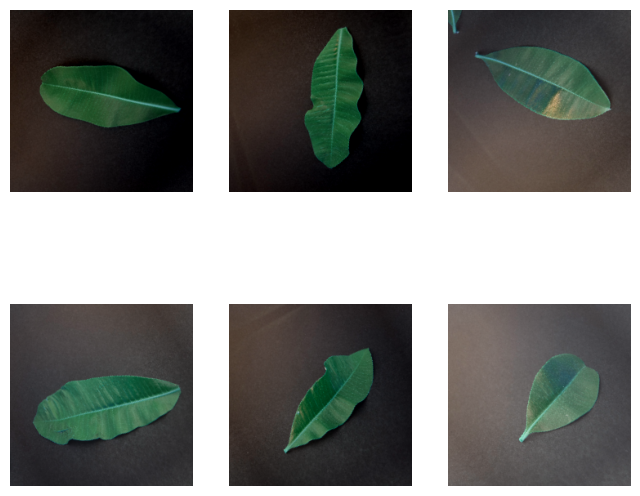

In [ ]:
plt.figure(figsize=(8, 7))
for i in range(6):
    augmented_image = data_augmentation(x[i])
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(augmented_image.numpy()/255)
    plt.axis("off")

In [ ]:
augmented_x = []
augmented_y = []
for i in range(len(x)//2):
    augmented_image = data_augmentation(x[i])
    augmented_x.append(x[i])
    augmented_y.append(y[i])
    augmented_x.append(augmented_image.numpy()/255)
    augmented_y.append(0)
for i in range(len(x)//2,len(x)):
    augmented_image = data_augmentation(x[i])
    augmented_x.append(x[i])
    augmented_y.append(y[i])
    augmented_x.append(augmented_image.numpy()/255)
    augmented_y.append(1)

In [ ]:
len(augmented_x),len(augmented_y)

(18008, 18008)

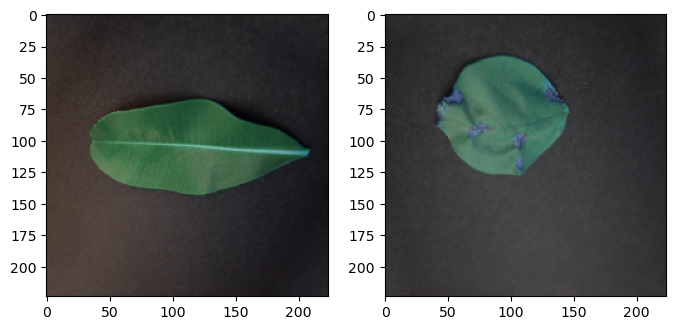

In [ ]:
plt.figure(figsize=(8, 7))
plt.subplot(1,2,1)
plt.imshow(augmented_x[1])
plt.subplot(1,2,2)
plt.imshow(augmented_x[-2])

In [ ]:
del(x)
del(y)

#### Saving Augmented 224*224 image to Numpy Array

```
np.save('Augmented_image/augmenetd_x_final.npy', augmented_x)
np.save('Augmented_image/augmenetd_y_final.npy', augmented_y)
```

## INPUT PIPELINE

### Train test split

In [ ]:
x=[]
y=[]
x = np.array(augmented_x)
y = np.array(augmented_y)
x.shape,y.shape
del augmented_x
del augmented_y
del augmented_image
del data_augmentation

#### Saving Augmented 224*224 image to Numpy Array

```
np.save('Augmented_image/augmenetd_x_final.npy', augmented_x)
np.save('Augmented_image/augmenetd_y_final.npy', augmented_y)
```

#### Loading Final Augmented Numpy Array directly from Disk

##### opening file

In [ ]:
data_path_x = 'numpy_arrays/Augmented_image/augmenetd_x_final.npy'
y = np.load('numpy_arrays/Augmented_image/augmenetd_y_final.npy')
x = np.load(data_path_x, mmap_mode='r') # input pipeline
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6753, 224, 224, 3), (2251, 224, 224, 3), (6753,), (2251,))

##### closing file

In [ ]:
x._mmap.close() # closing file

In [ ]:
del y

### Scaling Data

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
x_train_scaled.shape,x_test_scaled.shape

((6753, 224, 224, 3), (2251, 224, 224, 3))

In [ ]:
del x_train
del x_test

#### Saving Splitted Data to Numpy Array

```
np.save('train_test_splitted/x_train_scaled.npy',x_train_scaled)
np.save('train_test_splitted/x_test_scaled.npy',x_test_scaled)
np.save('train_test_splitted/y_train.npy',y_train)
np.save('train_test_splitted/y_test.npy',y_test)
```

# To Train Model Run All Cells Below

In [ ]:
os.chdir('/deepanshu/codes/leaves/')

In [ ]:
x_train_scaled = np.load(r'numpy_arrays/train_test_splitted/x_train_scaled.npy')
x_test_scaled = np.load(r'numpy_arrays/train_test_splitted/x_test_scaled.npy')
y_train = np.load(r'numpy_arrays/train_test_splitted/y_train.npy')
y_test = np.load(r'numpy_arrays/train_test_splitted/y_test.npy')

In [ ]:
x_train_scaled.shape,x_test_scaled.shape

((6753, 224, 224, 3), (2251, 224, 224, 3))

## Model training

### CNN Model

In [ ]:
cnn = tf.keras.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224,224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Flatten(),

    layers.Dense(128, activation='LeakyReLU'),
    #layers.Dropout(0.5),
    layers.Dense(64, activation='LeakyReLU', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    #layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01))
])


In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 batch_normalization_2 (Bat  (None, 222, 222, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 batch_normalization_3 (Bat  (None, 109, 109, 32)      128       
 chNormalization)                                                
                                                      

In [ ]:
from tensorflow.keras.optimizers import schedules, Adam

initial_learning_rate = 0.001
decay_steps = 10000
decay_rate = 0.9
staircase = True

lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=staircase
)

optimizer = Adam(learning_rate=lr_schedule)

In [ ]:
cnn.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
epochs = 50
batch_size = 32
history = cnn.fit(x_train_scaled, y_train,
                  validation_split=0.2,
                  epochs=epochs,              #validation_data=[x_test_scaled,y_test]
                  batch_size=batch_size,
                  callbacks=[early_stopping])

Epoch 1/50
169/169 [==============================] - 180s 1s/step - loss: 3.4923 - accuracy: 0.5729 - val_loss: 2.9191 - val_accuracy: 0.4967
Epoch 2/50
169/169 [==============================] - 149s 881ms/step - loss: 1.7045 - accuracy: 0.6396 - val_loss: 2.2986 - val_accuracy: 0.5033
Epoch 3/50
169/169 [==============================] - 148s 876ms/step - loss: 1.6211 - accuracy: 0.6538 - val_loss: 1.7391 - val_accuracy: 0.5574
Epoch 4/50
169/169 [==============================] - 148s 878ms/step - loss: 1.5465 - accuracy: 0.6557 - val_loss: 1.6213 - val_accuracy: 0.6358
Epoch 5/50
169/169 [==============================] - 148s 874ms/step - loss: 1.3707 - accuracy: 0.6773 - val_loss: 1.5987 - val_accuracy: 0.6358
Epoch 6/50
169/169 [==============================] - 147s 871ms/step - loss: 1.2737 - accuracy: 0.6901 - val_loss: 1.8980 - val_accuracy: 0.6380
Epoch 7/50
169/169 [==============================] - 147s 870ms/step - loss: 1.2186 - accuracy: 0.6988 - val_loss: 1.4127 - va

In [ ]:
cnn.evaluate(x_train_scaled,y_train)

212/212 [==============================] - 38s 180ms/step - loss: 0.6215 - accuracy: 0.7647


[0.6215237975120544, 0.7646971940994263]

In [ ]:
cnn.evaluate(x_test_scaled,y_test)

71/71 [==============================] - 12s 175ms/step - loss: 0.8790 - accuracy: 0.7161


[0.8789731860160828, 0.7161261439323425]

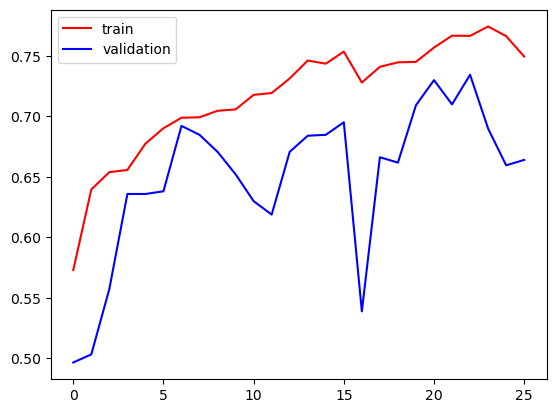

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

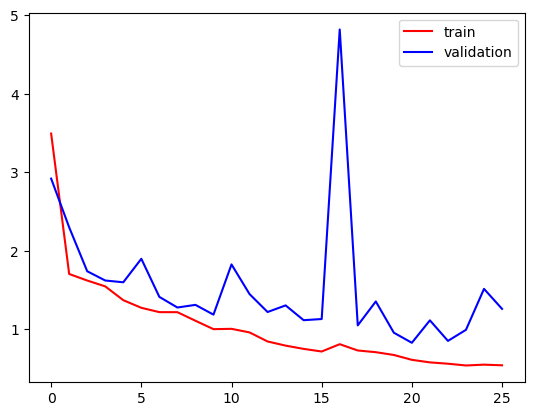

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
joblib.dump(cnn,'models/cnn.pkl')

['models/cnn.pkl']

### Load the MobileNetV2 model pre-trained on ImageNet

In [ ]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
base_model.trainable = False

### New model on top of the pre-trained base model

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    # tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='LeakyReLU'),
    layers.Dense(64, activation='LeakyReLU', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
initial_learning_rate = 0.001
decay_steps = 10000
decay_rate = 0.9
staircase = True

lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=staircase
)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_6 (Dense)             (None, 128)               163968    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2430273 (9.27 MB)
Trainable params: 1722

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model.fit(x_train_scaled, y_train,
          validation_split=0.2,
          epochs=epochs,              #validation_data=[x_test_scaled,y_test]
          batch_size=batch_size,
          callbacks=[early_stopping])

Epoch 1/50
169/169 [==============================] - 136s 782ms/step - loss: 1.0699 - accuracy: 0.6501 - val_loss: 0.7858 - val_accuracy: 0.6699
Epoch 2/50
169/169 [==============================] - 126s 745ms/step - loss: 0.6661 - accuracy: 0.6894 - val_loss: 0.6107 - val_accuracy: 0.6736
Epoch 3/50
169/169 [==============================] - 124s 734ms/step - loss: 0.5426 - accuracy: 0.7051 - val_loss: 0.5322 - val_accuracy: 0.7002
Epoch 4/50
169/169 [==============================] - 124s 735ms/step - loss: 0.4892 - accuracy: 0.6966 - val_loss: 0.5049 - val_accuracy: 0.7017
Epoch 5/50
169/169 [==============================] - 122s 724ms/step - loss: 0.4588 - accuracy: 0.7118 - val_loss: 0.5066 - val_accuracy: 0.7002
Epoch 6/50
169/169 [==============================] - 122s 726ms/step - loss: 0.4460 - accuracy: 0.7079 - val_loss: 0.4965 - val_accuracy: 0.6862
Epoch 7/50
169/169 [==============================] - 122s 724ms/step - loss: 0.4281 - accuracy: 0.7236 - val_loss: 0.4855 -

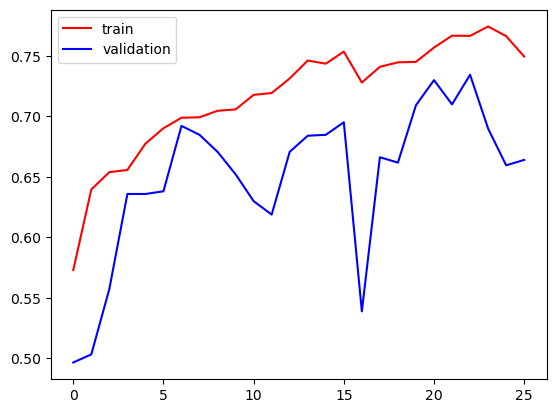

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

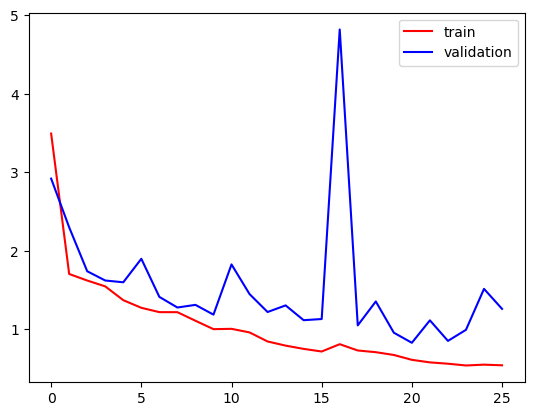

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test_scaled,y_test)

71/71 [==============================] - 44s 624ms/step - loss: 0.4925 - accuracy: 0.6895


[0.492456316947937, 0.6894713640213013]

In [ ]:
joblib.dump(model,'models/mobilenet.pkl')

['models/mobilenet.pkl']

### Improving Accuracy

```
freeze_layers_up_to = 100
for layer in base_model.layers[:freeze_layers_up_to]:
    layer.trainable = False
```

In [ ]:
model2 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.BatchNormalization()
    tf.keras.layers.Dense(128, activation='LeakyReLU'),
    tf.keras.layers.Dense(64, activation='LeakyReLU'), #kernel_regularizer=tf.keras.regularizers.l2(0.01)
    #tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(32, activation='LeakyReLU'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
initial_learning_rate = 0.0005
decay_steps = 10000
decay_rate = 0.9
staircase = True

lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=staircase
)

optimizer = Adam(learning_rate=lr_schedule)

model2.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_9 (Dense)             (None, 128)               163968    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                

In [ ]:
epochs = 50
history = model2.fit(x_train_scaled, y_train,
                     validation_split=0.2,
                     epochs=epochs,              #validation_data=[x_test_scaled,y_test]
                     batch_size=batch_size,
                     callbacks=[early_stopping])

Epoch 1/50
169/169 [==============================] - 361s 2s/step - loss: 0.3940 - accuracy: 0.7305 - val_loss: 0.4926 - val_accuracy: 0.6936
Epoch 2/50
169/169 [==============================] - 126s 747ms/step - loss: 0.3915 - accuracy: 0.7301 - val_loss: 0.5073 - val_accuracy: 0.6862
Epoch 3/50
169/169 [==============================] - 124s 732ms/step - loss: 0.3825 - accuracy: 0.7414 - val_loss: 0.4903 - val_accuracy: 0.7098
Epoch 4/50
169/169 [==============================] - 124s 733ms/step - loss: 0.3833 - accuracy: 0.7371 - val_loss: 0.4808 - val_accuracy: 0.6899
Epoch 5/50
169/169 [==============================] - 125s 742ms/step - loss: 0.3732 - accuracy: 0.7342 - val_loss: 0.4890 - val_accuracy: 0.6943
Epoch 6/50
169/169 [==============================] - 122s 722ms/step - loss: 0.3687 - accuracy: 0.7336 - val_loss: 0.5078 - val_accuracy: 0.7091
Epoch 7/50
169/169 [==============================] - 123s 726ms/step - loss: 0.3659 - accuracy: 0.7490 - val_loss: 0.5268 - va

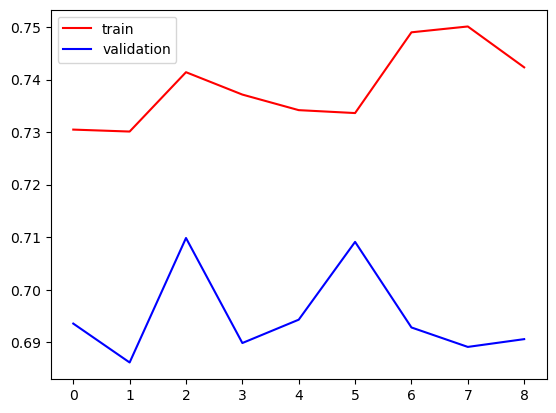

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

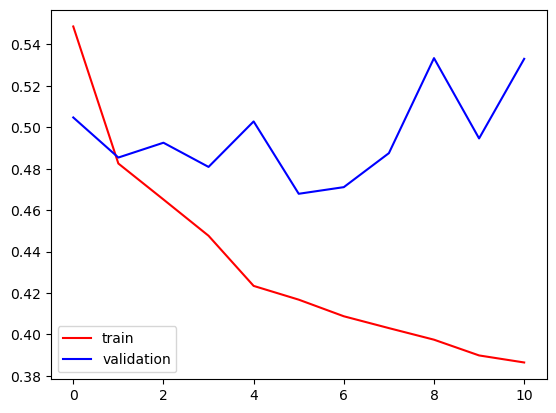

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model2.evaluate(x_test_scaled,y_test)

71/71 [==============================] - 40s 562ms/step - loss: 0.4690 - accuracy: 0.6961


[0.4690321981906891, 0.6961350440979004]

In [ ]:
joblib.dump(model2,'models/MobilenetFineTuned.pkl')

['models/MobilenetFineTuned.pkl']

# Testing

In [ ]:
model_dir = pathlib.Path('models/')
model_list = list(model_dir.glob('*.pkl'))
print('No. of models :',len(model_list))

No. of models : 3


In [ ]:
data_dir = pathlib.Path('numpy_arrays/')
image_list = list(data_dir.glob('*.npy'))
#print('No. of images :',len(image_list))

In [ ]:
model_list

[WindowsPath('models/cnn.pkl'),
 WindowsPath('models/mobilenet.pkl'),
 WindowsPath('models/MobilenetFineTuned.pkl')]

In [ ]:
x_test_scaled = np.load(r'numpy_arrays/train_test_splitted/x_test_scaled.npy')
y_test = np.load(r'numpy_arrays/train_test_splitted/y_test.npy')

(-0.5, 223.5, 223.5, -0.5)

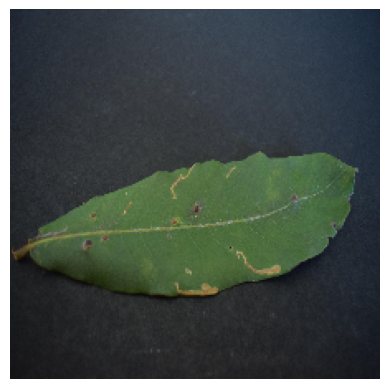

In [ ]:
n = 500
im = ((x_test_scaled[n])*255).astype(np.uint8)
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
plt.axis("off")

In [ ]:
for models in model_list:
    print((str(models).split("\\"))[-1])
    model = joblib.load(str(models))
    print(model.evaluate(x_test_scaled,y_test),'\n')
    print(model.predict(x_test_scaled),'\n')

cnn.pkl
71/71 [==============================] - 12s 170ms/step - loss: 0.8790 - accuracy: 0.7161
[0.8789731860160828, 0.7161261439323425] 

71/71 [==============================] - 15s 184ms/step
[[4.6692178e-01]
 [3.5995541e-05]
 [4.7964582e-01]
 ...
 [4.3437073e-01]
 [9.4761048e-04]
 [9.9981886e-01]] 

mobilenet.pkl
71/71 [==============================] - 44s 598ms/step - loss: 0.4925 - accuracy: 0.6895
[0.492456316947937, 0.6894713640213013] 

71/71 [==============================] - 45s 594ms/step
[[0.48118958]
 [0.11581728]
 [0.48070627]
 ...
 [0.48131365]
 [0.0516194 ]
 [0.9522611 ]] 

MobilenetFineTuned.pkl
71/71 [==============================] - 44s 597ms/step - loss: 0.4788 - accuracy: 0.6952
[0.47877076268196106, 0.6952465772628784] 

71/71 [==============================] - 46s 620ms/step
[[0.4694763 ]
 [0.00975387]
 [0.46931514]
 ...
 [0.46921575]
 [0.03942098]
 [0.9945121 ]] 



# Quantization

In [ ]:
with open('models/mobilenet.pkl', 'rb') as f:
    loaded_model = joblib.load(f)

In [ ]:
# Convert the loaded model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [ ]:
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\DARIN\AppData\Local\Temp\tmp9mvtqiyq\assets


INFO:tensorflow:Assets written to: C:\Users\DARIN\AppData\Local\Temp\tmp9mvtqiyq\assets


In [ ]:
len(tflite_model)

2683288

In [ ]:
with open('models/mobilenetv2_float.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
interpreter = tf.lite.Interpreter(model_path='models/mobilenetv2_float.tflite')
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'],x_test_scaled[15].reshape(1,224,224,3))

In [ ]:
interpreter.invoke()

In [ ]:
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
output_data

array([[0.53373915]], dtype=float32)

In [ ]:
y_test[15]

0

In [ ]:
from cv2 import COLOR_BGR2RGB

In [ ]:
def predict(n):
    interpreter.set_tensor(input_details[0]['index'],x_test_scaled[n].reshape(1,224,224,3))
    interpreter.invoke()
    output_details = interpreter.get_output_details()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    print('predicted:',output_data[0][0],'actual:',y_test[n])
    augmented_image = ((x_test_scaled[n])*255).astype(np.uint8)
    plt.imshow(cv2.cvtColor(augmented_image,cv2.COLOR_BGR2RGB))
    plt.axis("off")

predicted: 0.99167943 actual: 1


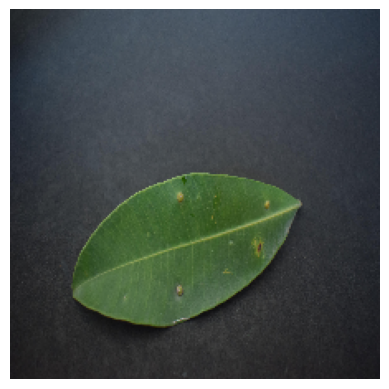

In [ ]:
predict(1862)